In [12]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

#import my modules
import acquire 
import prepare 
import wrangle 

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .


In [13]:
df = wrangle.wrangle_zillow()

In [18]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074798 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   bedroomcnt                    2074798 non-null  int64  
 1   bathroomcnt                   2074798 non-null  float64
 2   calculatedfinishedsquarefeet  2074798 non-null  float64
 3   taxvaluedollarcnt             2074798 non-null  float64
 4   yearbuilt                     2074798 non-null  int64  
 5   taxamount                     2074798 non-null  float64
 6   fips                          2074798 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 126.6 MB


In [14]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
18,3,1.0,1244.0,169471.0,1950,2532.88,6037
19,3,2.0,1300.0,233266.0,1950,3110.99,6037


In [15]:
train, validate, test = wrangle.split_data(df)

train -> (1161886, 7)
validate -> (497952, 7)
test -> (414960, 7)


In [31]:
scaler_mc = MinMaxScaler()

In [32]:
scaler_mc.fit(train)

MinMaxScaler()

In [33]:
train_scaled = scaler_mc.transform(train)

In [37]:
#Combine fit and transform together
train_scaled2 = scaler_mc.fit_transform(train)

In [35]:
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)

In [39]:
train_scaled2 = pd.DataFrame(train_scaled2, columns=train.columns)

In [40]:
train_scaled.head()


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.222222,0.100,0.000937,0.003751,0.716279,0.004155,1.000000
1,0.277778,0.125,0.001386,0.007173,0.758140,0.007103,0.297297
2,0.222222,0.100,0.000592,0.006488,0.753488,0.006075,0.297297
3,0.166667,0.050,0.000576,0.003656,0.553488,0.003667,0.000000
4,0.166667,0.100,0.000877,0.003492,0.846512,0.003589,0.000000


In [41]:
train_scaled2.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.222222,0.100,0.000937,0.003751,0.716279,0.004155,1.000000
1,0.277778,0.125,0.001386,0.007173,0.758140,0.007103,0.297297
2,0.222222,0.100,0.000592,0.006488,0.753488,0.006075,0.297297
3,0.166667,0.050,0.000576,0.003656,0.553488,0.003667,0.000000
4,0.166667,0.100,0.000877,0.003492,0.846512,0.003589,0.000000


<AxesSubplot:>

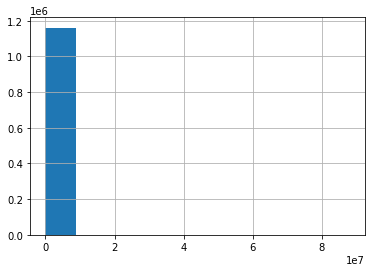

In [27]:
#unscaled
train.taxvaluedollarcnt.hist()

<AxesSubplot:>

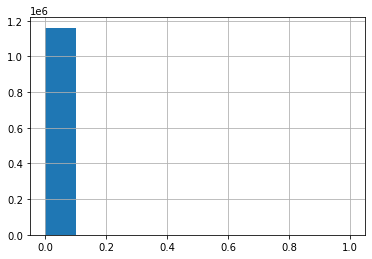

In [28]:
#scaled
train_scaled.taxvaluedollarcnt.hist()

In [51]:
scaler = StandardScaler()

In [52]:
train_scale = scaler.fit_transform(train)

In [53]:
train_scale= pd.DataFrame(train_scale, columns=train.columns)
train_scale.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.728133,-0.279868,-0.146128,-0.201251,-0.298393,-0.166128,3.068826
1,1.840898,0.229969,0.160555,0.237959,0.111635,0.226144,0.519476
2,0.728133,-0.279868,-0.382425,0.150085,0.066076,0.089414,0.519476
3,-0.384632,-1.299543,-0.393199,-0.213360,-1.892943,-0.231078,-0.559094
4,-0.384632,-0.279868,-0.187067,-0.234487,0.977247,-0.241396,-0.559094


Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [54]:
train_scale = scaler.inverse_transform(train)

In [55]:
train_scale= pd.DataFrame(train_scale, columns=train.columns)

In [56]:
train_scale.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,6.940304,4.235878,2.357695e+06,2.264222e+11,44873.342395,3.471519e+07,130696.678012
1,7.838967,4.726231,2.952214e+06,4.329848e+11,45070.890290,5.923911e+07,129636.015232
2,6.940304,4.235878,1.899623e+06,3.916572e+11,45048.940524,5.069106e+07,129636.015232
3,6.041642,3.255173,1.878738e+06,2.207274e+11,44105.100581,3.065464e+07,129187.273287
4,6.041642,4.235878,2.278333e+06,2.107910e+11,45487.935846,3.000961e+07,129187.273287


Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [57]:
def scaled_df ( train_df , validate_df, test_df, scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_validate , X_test, RobustScaler())
    
    '''
    #get all columns except object type
    columns = train_df.select_dtypes(exclude='object').columns.tolist()
    
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    validate_scaled= scaler.transform(validate_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    validate_scaled_df = pd.DataFrame(validate_scaled, columns=columns).set_index([validate_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df, validate_scaled_df, test_scaled_df

In [58]:
scaler = MinMaxScaler()

(         bedroomcnt  bathroomcnt  calculatedfinishedsquarefeet  \
 775411     0.222222        0.100                      0.000937   
 1160935    0.277778        0.125                      0.001386   
 1558975    0.222222        0.100                      0.000592   
 2049378    0.166667        0.050                      0.000576   
 1250609    0.166667        0.100                      0.000877   
 ...             ...          ...                           ...   
 1458442    0.166667        0.100                      0.000841   
 889840     0.222222        0.100                      0.000822   
 554380     0.222222        0.150                      0.001765   
 570725     0.277778        0.275                      0.003671   
 1769311    0.111111        0.100                      0.000244   
 
          taxvaluedollarcnt  yearbuilt  taxamount      fips  
 775411            0.003751   0.716279   0.004155  1.000000  
 1160935           0.007173   0.758140   0.007103  0.297297  
 1558975

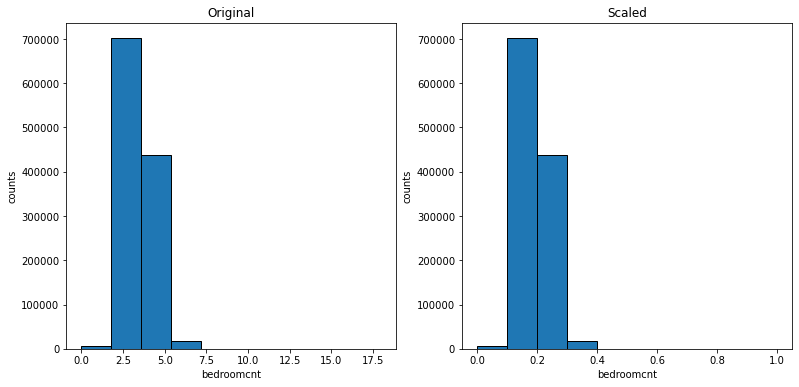

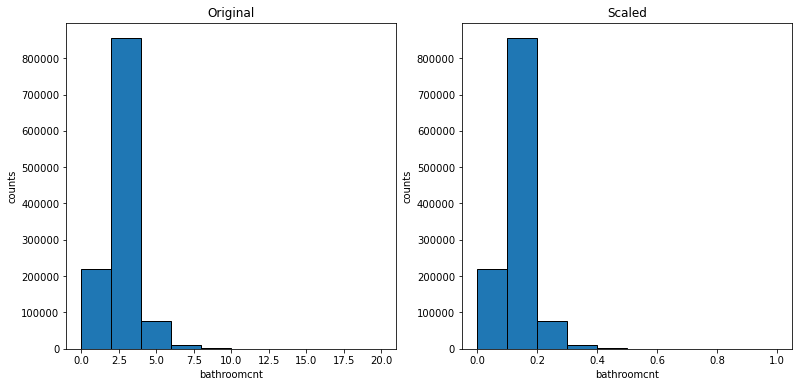

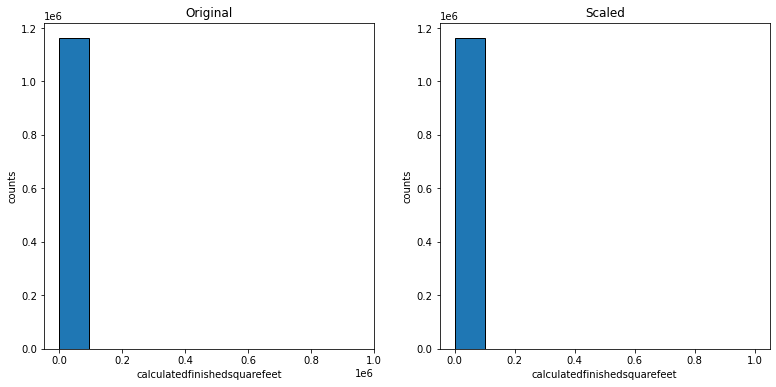

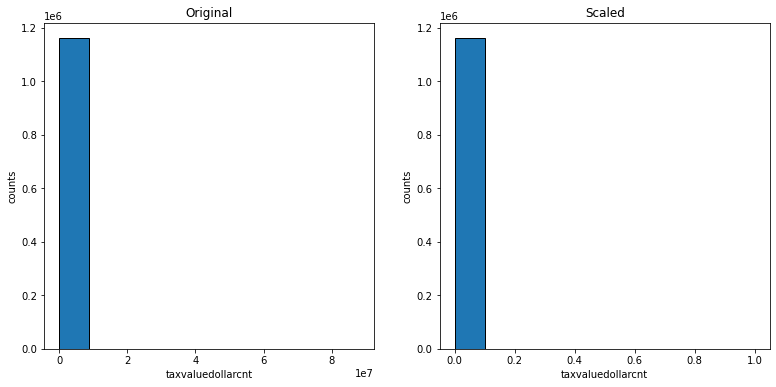

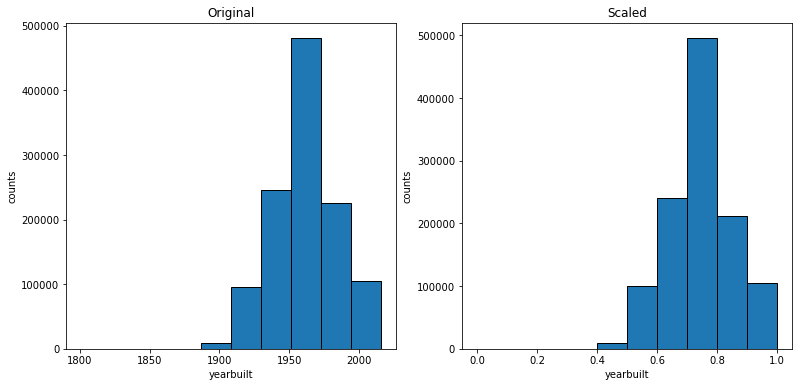

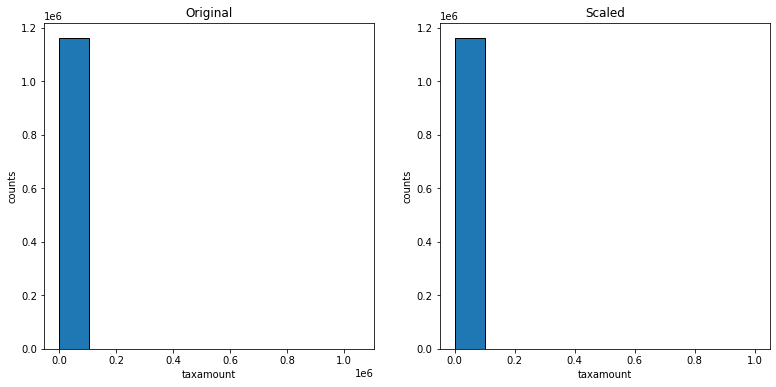

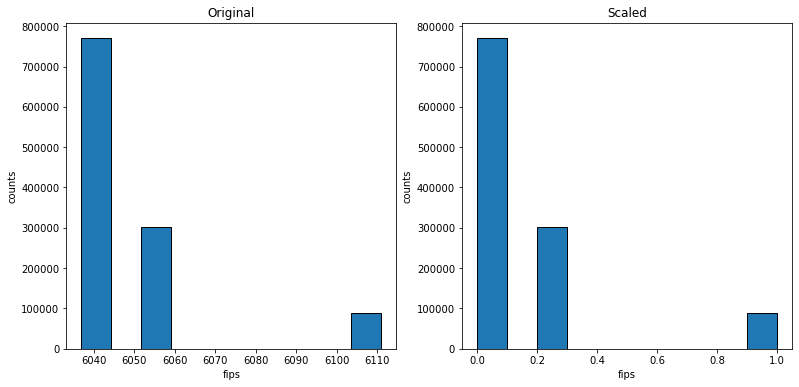

In [59]:
scaled_df(train, validate, test, scaler)